### Plastics Companies, PFCs & Maine Groundwater

This notebook examines the number of public and private water sources within one mile of the plastics manufacturing companies in Maine. The plastics manufacturing company list was compiled from a Google search for "plastics fabrication maine," using the lat/long of each company. 

Private and public well data, along with shapefiles for the state, came from the Maine Office of GIS: http://www.maine.gov/megis/catalog/. 

Maine shapefiles used:
County Boundaries (CNTY24) and Town Boundaries (METWP24). 

Well maps used: 
Public drinking water wells (WELLS)
Private/Domestic wells (Maine Geological Survey water well database)

Other potential maps that could be made are wells and airports, public drinking water buffers (ask for clarification), public drinking water groundwater models, public drinking water surface supply watersheds.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt


from selenium import webdriver
driver = webdriver.Chrome()


In [2]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [3]:
#moved to another notebook
# from selenium import webdriver
# driver = webdriver.Chrome()
# driver.get("https://www.google.com/search?tbm=lcl&ei=mTf2WZXrGJigjwTTkp7IAw&q=plastic+fabrication+maine&oq=plastic+fabrication+maine&gs_l=psy-ab.3...93286.94666.0.94992.13.10.0.0.0.0.237.1120.0j3j3.6.0....0...1.1.64.psy-ab..11.2.334...0i7i30k1j0i30k1j0i8i7i30k1.0.4Ch8ZGUuMmE#rlfi=hd:;si:;mv:!1m3!1d1792728.8383884456!2d-69.3689406!3d45.0501707!2m3!1f0!2f0!3f0!3m2!1i271!2i477!4f13.1;tbs:lrf:!2m1!1e3!3sIAE,lf:1,lf_ui:2")
# companies = driver.find_elements_by_class_name("_rl")
# for each_company in companies:
#     print(each_company.text.strip())

In [4]:
#here's the final list of the google search results for "plastics fabrication companies maine"
#with the lat/long
plastics = pd.read_csv('plastics_companies_maine - Sheet1.csv')
plastics.head()

,company,latitude,longitude
0,Garland Manufacturing,44.879474,-70.575862
1,Triple M Plastics,44.817988,-70.575954
2,Maine Mold and Machine Company,45.044688,-70.489896
3,Plastic Design Maine,45.044688,-70.489896
4,Quality Containers of New England,45.033105,-70.482236


In [5]:
type(plastics)

pandas.core.frame.DataFrame

In [6]:
#let's give it geometry and turn it into a geodataframe


#apply geometry to the lat/long columns

points = plastics.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

#save it as a geodataframe
plastics = gpd.GeoDataFrame(plastics, geometry=points)

#give it geometry. you have to initiliaze the geometry, remember?
#use this code instead of the df.to_crs(epsg=4326)
plastics.crs = {'init': 'epsg:4326'}

plastics.head()

,company,latitude,longitude,geometry
0,Garland Manufacturing,44.879474,-70.575862,POINT (-70.5758622 44.8794743)
1,Triple M Plastics,44.817988,-70.575954,POINT (-70.57595359999999 44.8179885)
2,Maine Mold and Machine Company,45.044688,-70.489896,POINT (-70.4898963 45.0446877)
3,Plastic Design Maine,45.044688,-70.489896,POINT (-70.4898963 45.0446877)
4,Quality Containers of New England,45.033105,-70.482236,POINT (-70.4822356 45.0331052)


In [7]:
plastics

,company,latitude,longitude,geometry
0,Garland Manufacturing,44.879474,-70.575862,POINT (-70.5758622 44.8794743)
1,Triple M Plastics,44.817988,-70.575954,POINT (-70.57595359999999 44.8179885)
2,Maine Mold and Machine Company,45.044688,-70.489896,POINT (-70.4898963 45.0446877)
3,Plastic Design Maine,45.044688,-70.489896,POINT (-70.4898963 45.0446877)
4,Quality Containers of New England,45.033105,-70.482236,POINT (-70.4822356 45.0331052)
5,Maine Composites,44.089992,-69.817246,POINT (-69.8172464 44.0899921)
6,Plasmine Technology Inc,44.089992,-70.297316,POINT (-70.29731600000001 44.0899921)
7,Sullivan Plastics Products,44.508986,-68.165611,POINT (-68.1656107 44.508986)
8,Bucksport Marine & Metal,44.572414,-68.763712,POINT (-68.7637125 44.5724144)
9,Jarden Plastic Solution,44.617539,-70.188521,POINT (-70.18852120000001 44.6175392)


In [8]:
type(plastics)

geopandas.geodataframe.GeoDataFrame

In [9]:
plastics.crs

{'init': 'epsg:4326'}

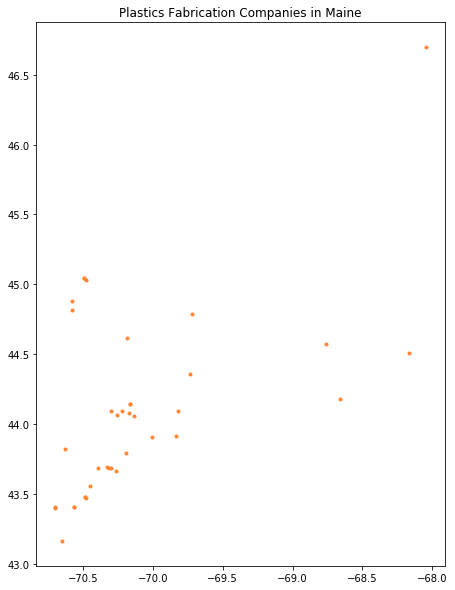

In [10]:
plastics.plot(figsize=(20,10), markersize=3, color='#ff8533')
plt.title('Plastics Fabrication Companies in Maine')

Let's import the shapefiles for the state. There are two, maine and towns. Maine has the county outlines; towns has the town outlines.


In [11]:
towns = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/shapefiles/maine_shapefile/MEGIS_Town_Bdys/Metwp24P_Dissolve.shp')
#there is already a projection for this
#so the code below is to change it to the appropriate crs
towns = towns.to_crs(epsg=4326) 
# towns = towns.to_crs({'init': 'epsg:4326'})
towns.head()

,Shape_STAr,Shape_STLe,TOWN,geometry
0,3.064597e+04,1410.535155,,(POLYGON ((-67.09989201819894 44.5002512448684...
1,9.238878e+07,38485.033858,Abbot,POLYGON ((-69.40209016712616 45.16090239501673...
2,1.064538e+08,53561.995352,Acton,POLYGON ((-70.90845384331172 43.59759385230325...
3,1.000542e+08,40046.363581,Adamstown Twp,POLYGON ((-70.80453749691881 44.92493370313953...
4,2.600747e+08,79762.958904,Addison,POLYGON ((-67.66439971241121 44.64323840453836...


In [12]:
towns.crs

{'init': 'epsg:4326', 'no_defs': True}

In [13]:
#why can't I force these geometries to be the same?
#something is wrong with the crs for plastics
# towns = towns.to_crs(plastics_df.crs)


In [14]:
# towns.plot(figsize=(20,15), color='#808080', edgecolor='white')


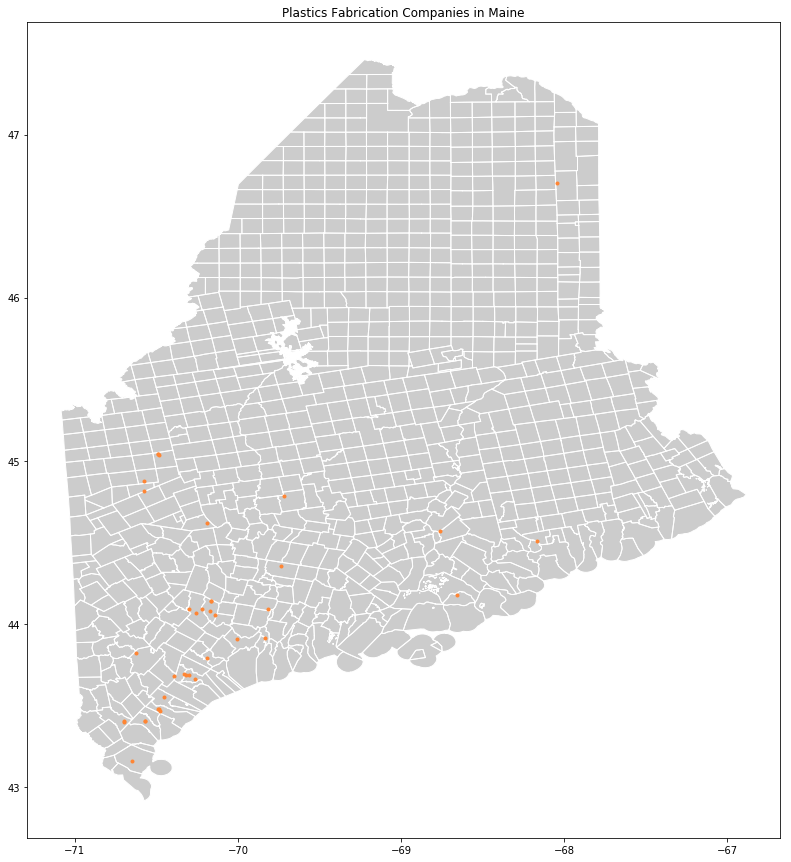

In [15]:
ax = towns.plot(figsize=(20,15), color='#808080', edgecolor='white', alpha=0.4)
plastics.plot(ax=ax, figsize=(20,10), markersize=3, color='#ff8533')
plt.title('Plastics Fabrication Companies in Maine')
plt.savefig('platics_companies_only.png')

Decided to work with the town map instead of the county one, but kept the code for the county

In [16]:
# #import the shapefile with county lines for Maine
# maine = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/shapefiles/maine_shapefile/Cnty24L.shp')
# maine.to_crs = {'init': 'epsg:4326'}
# maine.geometry.head()
# # maine.head()
# # maine.plot()

In [17]:
# # save the first layer as ax
# ax = maine.plot(figsize=(25,10), color='#A9A9A9')

# # pass ax=ax to the second layer

# plastics.plot(figsize=(25,10), color='#1da1f2', markeredgewidth=0, markersize=3, ax=ax)

# ax.axis('off')

In [18]:
public_wells = gpd.read_file('/Users/kaitlincough/Documents/freelance/landfills_wells/maine_public_wells/wells.shp')
#force its geometry to be less terrible
public_wells = public_wells.to_crs(epsg=4326) 
public_wells.head()

,BUFFER_ID,FMNOTE,FMPROCSS,FMSRC,FMSRCDAT,FMSRCORG,FMUPDDAT,FMUPDORG,PWSID,RADIUS,SWAP,TYPE,geometry
0,6486,,,,None,,None,,92313101,300,92313101.pdf,C,POINT (-67.79868256972696 46.12661618762361)
1,-1,,,,None,,None,,5826101,300,,C,POINT (-69.75638838330988 44.2111735958966)
2,0,,,,None,,None,,91230201,2500,91230201.pdf,C,POINT (-70.51713768750778 44.25060748847198)
3,6019,,,,None,,None,,17468101,300,17468101.pdf,NC,POINT (-68.37374834384754 44.49102980455725)
4,6787,,,,None,,None,,200908101,500,200908101.pdf,NC,POINT (-70.76861132833282 44.12213059791925)


In [19]:
#ch ch check it always
type(public_wells)

geopandas.geodataframe.GeoDataFrame

In [20]:
#make sure the forced crs worked
public_wells.crs

{'init': 'epsg:4326', 'no_defs': True}

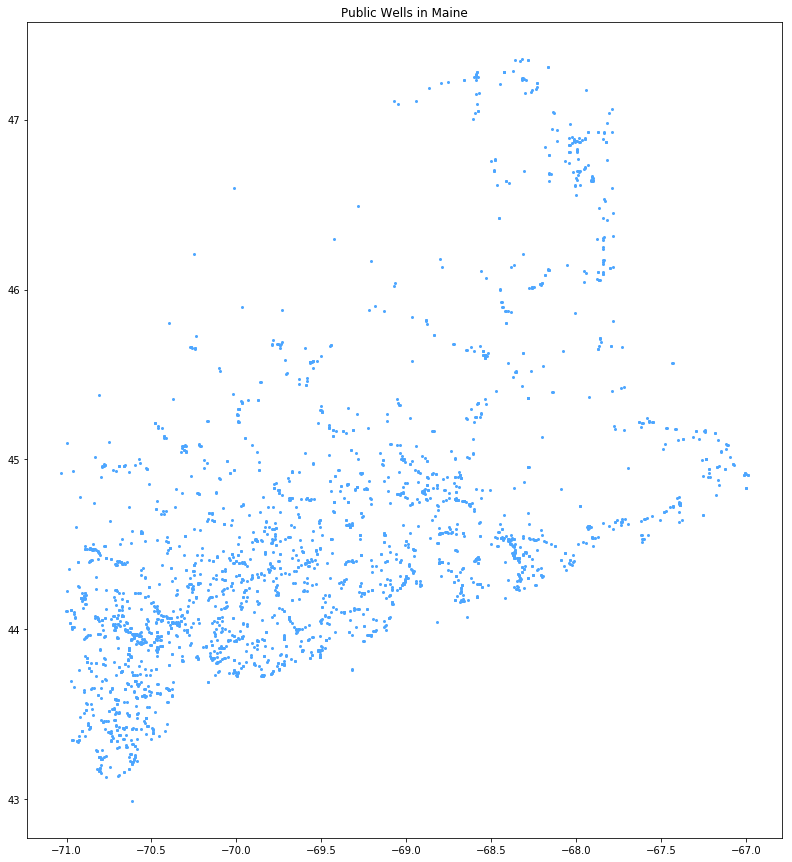

In [ ]:
public_wells.plot(figsize=(20,15), markersize=2, color='#4da6ff')
plt.title('Public Wells in Maine')


In [ ]:
#let's map the public wells onto the state of maine.

#make the state of maine the first layer
ax = towns.plot(figsize=(20,15), color='white', edgecolor='gray', alpha=0.01)

# pass ax=ax to the second layer, which is the public wells

public_wells.plot(figsize=(20,15), color='#4da6ff', markeredgewidth=0, markersize=3, ax=ax)

#let's also plot the plastics companies

plastics.plot(ax=ax, figsize=(20,15), markersize=3, color='#ff8533')

plt.title('Public Wells in Maine (blue) and Plastics Companies (orange) with Town Overlay')

ax.axis('off')

plt.savefig('public_wells_plastics_companies.pdf')

In [ ]:
#note that the private well data is in a csv
#not in a shapefile like the public well data
private_wells = pd.read_csv ('/Users/kaitlincough/Documents/data_studio/current_projects/data-studio-projects/code/maine_landfills/notebooks/mgs_wells.csv', low_memory=False)
private_wells.head()

In [ ]:
type(private_wells)

In [ ]:
#let's look at the private wells 
points = private_wells.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)
private_wells = gpd.GeoDataFrame(private_wells, geometry=points)
private_wells.crs = {'init': 'epsg:4326'}
private_wells.head()

In [ ]:
type(private_wells)

In [ ]:
private_wells.crs

### Below is some plotting that takes a long time and is kind of unecessary, but there you have it.

In [ ]:
# private_wells.plot(figsize=(25,10), color='#ff1493', markeredgewidth=0, markersize=3)

In [ ]:
# #let's map the private wells onto the state of maine.
# #this takes forever so be careful

# #make the towns the first layer
# ax = towns.plot(figsize=(20,15), color='#808080', edgecolor='white')

# # pass ax=ax to the second layer, which is the private wells layer
# #private wells are green

# private_wells.plot(figsize=(25,10), color='#006600', markeredgewidth=0, markersize=3, ax=ax)
# plt.title('Private Wells in Maine with Town Overlay')

# ax.axis('off')

### The next step is to put a buffer around the plastics companies (I've chosen 1 mile, since that's the radius the EPA is using to test) and to see how many private/public wells are within the buffer.

In [ ]:
#let's put a buffere of 1 mile around the plastics companies
#and save it in a variabe to use later
buffered_plastics = plastics.buffer(0.014)
buffered_plastics.head()


In [ ]:
type(buffered_plastics)

In [ ]:
buffered_plastics.crs

In [ ]:
ax = towns.plot(figsize=(20,15), color='white', edgecolor='gray', alpha=0.01)
buffered_plastics.plot(figsize=(20,15), color='#ff8533', ax=ax)
plt.title('Plastics Fabrication Companies with One Mile Buffer')

Let's look at the number of private wells that are within the 1 mile buffer. We'll save it in a variable to use later.

In [ ]:
#and see how many private wells are within the 1 mile buffer
#and save it so we can use it later
private_wells_within_one_mile = private_wells[private_wells.intersects(buffered_plastics.unary_union)]

In [ ]:
type(private_wells_within_one_mile)

In [ ]:
private_wells_within_one_mile.to_crs(epsg=4326)

In [ ]:
private_wells_within_one_mile.crs

In [ ]:
private_wells_within_one_mile.shape

Let's do the same for public wells.

In [ ]:
#now let's look at the public wells within one mile of plastics companies
public_wells_within_one_mile = public_wells[public_wells.intersects(buffered_plastics.unary_union)]
public_wells_within_one_mile

In [ ]:
public_wells_within_one_mile.shape

In [ ]:
type(public_wells_within_one_mile)

### Now let's do some plotting: first the buffers themselves and then the private wells within them, with no state overlay.

In [ ]:
#here we can plot the buffers themselves
#and then the private wells within them in green
ax = buffered_plastics.plot(figsize=(30,20), edgecolor='gray', alpha=0.01)
private_wells_within_one_mile.plot(ax=ax, figsize=(20,10), color='#006600', markersize=0.5)
plt.title('Private Wells (green) Within One Mile of Plastics Fabrication Companies, With Buffers')

...and now we're going to map the private wells that are within one mile of plastics companies (we've already saved this variable above) onto the state map. There's no need to map the buffers, although we could add the plastics companies if we wanted.

In [ ]:
#let's map the private wells within one mile of plastics companies
#onto the town basemap

#the first layer is the town layer
ax = towns.plot(figsize=(30,15), color='white', edgecolor='gray', alpha=0.01)

#then the plastics companies in orange
plastics.plot(ax=ax, figsize=(20,15), color="#ff8533", markersize=1)

#then the private wells themselves, in green
private_wells_within_one_mile.plot(ax=ax, figsize=(30,15), color='#006600', markersize=1)

#give it a title
plt.title('Private Wells (green) Within One Mile of Plastics Manufacturing Companies (orange) (Town Overlay)')
ax.axis('off')

#save it
plt.savefig('private_wells_one_mile_town_overlay.pdf')

In [ ]:
#now we can map the private wells within one mile of plastics companies
#onto the town basemap
ax = towns.plot(figsize=(30,15), color='white', edgecolor='gray', alpha=0.01)
#plastics companies are a shade of orange
plastics.plot(ax=ax, figsize=(20,15), color="#ff8533", markersize=2)
#public wells are blue
public_wells_within_one_mile.plot(ax=ax, figsize=(20,15), color='#4da6ff', markersize=2)
plt.title('Public Wells (blue) Within One Mile of Plastics Manufacturing Companies (orange) (Town Overlay)')
ax.axis('off')
plt.savefig('public_wells_one_mile_town_overlay.pdf')